## Data paths

In [3]:
DATA_PATH = r"D:\datasets_complete\datasets-projects\online+retail+ii\online_retail_II.xlsx"


# Data Variable Information
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).
 
*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

[Link to info](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

# Imports

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Data read and dataframe creation (`PANDAS`)

In [5]:
# df = pd.read_excel(DATA_PATH, sheet_name="Year 2010-2011")


In [6]:
# Saved to avoid re-loading the excel file.
# df.to_pickle('df_2010-2011.pkl')


In [7]:
# Load the pre-saved pickle file
df = pd.read_pickle('df_2010-2011.pkl')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
display(df.describe())
df.describe(include=['O'])


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [10]:
# Normalization of columns names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df_column_names = df.columns.to_list()
df_column_names


['invoice',
 'stockcode',
 'description',
 'quantity',
 'invoicedate',
 'price',
 'customer_id',
 'country']

# EDA Notes

Client Clustering

- `541910` entries, `Description` and `Customer ID` do not match the number of entries (missing values).
- Negative values in `Quantity`: `-80995.000000`. It matches the **max** amount.
- Negative values in `Price`: `-11062.060000`.
- `25900` unique `Invoice` values.
- `4070` unique `StockCode` values, meaning 4070 products; but `4223` `Description` values. 

### `invoice` column

In [12]:
df[df['quantity']<0].head() # Overview of `quantity` negative values


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [13]:
df['invoice'] = df['invoice'].astype('str')
df_cancellation_invoices = df[df['invoice'].str.startswith('C')]
# df[df['invoice'].str.match("^\\d{6}$") == False] # Regex for NOT 6 consecutive numbers as invoice id
display(df_cancellation_invoices.head())
print("Invoices that are cancellations:", df_cancellation_invoices.shape[0]) # According to the data information website


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Invoices that are cancellations: 9288


In [14]:
# Other letters in 'invoice' column
df['invoice'].str.replace("[0-9]", "", regex=True).unique()
# Output: There are invoices that start with 'C' and 'A' letters.


array(['', 'C', 'A'], dtype=object)

In [15]:
display(df[df['invoice'].str.startswith('A')].head()) # Overview of `A` invoices
# These are adjustments invoices. Erase these rows.
# List indexes to drop
indexes_to_drop = df[df['invoice'].str.startswith('A')].index
# display(indexes_to_drop)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## `stockcode` column

In [16]:
df['stockcode'] = df['stockcode'].astype('str')


In [17]:
stockcodes_abnormal = df[(df['stockcode'].str.match("^\\d{5}$") == False) & (df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stockcode'].unique()
# Regex for NOT 5 consecutive numbers or 5 consecutive numbers followed by letters in the values of 'stockcode' column
print("Abnormal stockcodes:", stockcodes_abnormal)
# Output: There are some abnormal stockcodes


Abnormal stockcodes: ['POST' 'D' 'C2' 'DOT' 'M' 'BANK CHARGES' 'S' 'AMAZONFEE' 'DCGS0076'
 'DCGS0003' 'gift_0001_40' 'DCGS0070' 'm' 'gift_0001_50' 'gift_0001_30'
 'gift_0001_20' 'DCGS0055' 'DCGS0072' 'DCGS0074' 'DCGS0069' 'DCGS0057'
 'DCGSSBOY' 'DCGSSGIRL' 'gift_0001_10' 'PADS' 'DCGS0004' 'DCGS0073'
 'DCGS0071' 'DCGS0066P' 'DCGS0068' 'DCGS0067' 'B' 'CRUK']


In [18]:
# Show entries witch each abnormal stockcode in stockcodes_abnormal
for code in stockcodes_abnormal:
    display(df[df['stockcode'] == code].head(10))


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5095,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
5325,536858,POST,POSTAGE,2,2010-12-03 10:36:00,40.0,13520.0,Switzerland
5369,536861,POST,POSTAGE,3,2010-12-03 10:44:00,18.0,12427.0,Germany
6602,536967,POST,POSTAGE,1,2010-12-03 12:57:00,18.0,12600.0,Germany
6676,536974,POST,POSTAGE,2,2010-12-03 13:59:00,18.0,12682.0,France
6973,536983,POST,POSTAGE,1,2010-12-03 14:30:00,18.0,12712.0,Germany


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom
31663,C539003,D,Discount,-1,2010-12-15 12:35:00,26.93,14527.0,United Kingdom
38609,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527.0,United Kingdom
44405,C540171,D,Discount,-1,2011-01-05 12:26:00,22.97,14527.0,United Kingdom
88032,C543752,D,Discount,-1,2011-02-11 14:12:00,64.27,14031.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.0,14911.0,EIRE
12119,537368,C2,CARRIAGE,1,2010-12-06 12:40:00,50.0,14911.0,EIRE
12452,537378,C2,CARRIAGE,1,2010-12-06 13:06:00,50.0,14911.0,EIRE
19975,537963,C2,CARRIAGE,1,2010-12-09 11:30:00,50.0,13369.0,United Kingdom
20016,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
34369,539337,C2,CARRIAGE,1,2010-12-17 10:46:00,50.0,NaN,EIRE
34725,539421,C2,CARRIAGE,1,2010-12-17 14:21:00,50.0,14016.0,EIRE
37644,539473,C2,CARRIAGE,1,2010-12-19 14:24:00,50.0,14911.0,EIRE
39777,539688,C2,CARRIAGE,1,2010-12-21 11:00:00,150.0,12678.0,France
42332,539984,C2,CARRIAGE,1,2010-12-23 14:58:00,50.0,14911.0,EIRE


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
1815,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom
5686,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom
6165,536876,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,NaN,United Kingdom
10812,537237,DOT,DOTCOM POSTAGE,1,2010-12-06 09:58:00,863.74,NaN,United Kingdom
11381,537240,DOT,DOTCOM POSTAGE,1,2010-12-06 10:08:00,940.87,NaN,United Kingdom
13924,537434,DOT,DOTCOM POSTAGE,1,2010-12-06 16:57:00,950.99,NaN,United Kingdom
15650,537638,DOT,DOTCOM POSTAGE,1,2010-12-07 15:28:00,836.14,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom
5685,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327.0,United Kingdom
8587,537140,M,Manual,1,2010-12-05 12:53:00,0.42,12748.0,United Kingdom
8588,537140,M,Manual,1,2010-12-05 12:53:00,0.85,12748.0,United Kingdom
9326,537199,M,Manual,1,2010-12-05 14:06:00,0.65,15894.0,United Kingdom
9575,537208,M,Manual,4,2010-12-05 15:12:00,0.85,15889.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom
14435,C537572,BANK CHARGES,Bank Charges,-1,2010-12-07 12:00:00,95.38,NaN,United Kingdom
28992,C538680,BANK CHARGES,Bank Charges,-1,2010-12-13 17:10:00,966.92,NaN,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,2011-01-18 15:58:00,15.00,15939.0,United Kingdom
64573,C541653,BANK CHARGES,Bank Charges,-1,2011-01-20 11:50:00,1050.15,NaN,United Kingdom
90558,C544049,BANK CHARGES,Bank Charges,-1,2011-02-15 12:39:00,566.37,NaN,United Kingdom
96675,C544575,BANK CHARGES,Bank Charges,-1,2011-02-21 13:58:00,134.76,NaN,United Kingdom
96676,C544576,BANK CHARGES,Bank Charges,-1,2011-02-21 14:01:00,149.16,NaN,United Kingdom
96715,C544584,BANK CHARGES,Bank Charges,-1,2011-02-21 14:52:00,109.84,NaN,United Kingdom
112233,C545887,BANK CHARGES,Bank Charges,-1,2011-03-07 15:54:00,326.68,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom
96683,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,6.70,NaN,United Kingdom
96684,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,8.74,NaN,United Kingdom
96685,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,9.74,NaN,United Kingdom
96686,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,9.99,NaN,United Kingdom
96687,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,20.98,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16002,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
21326,538071,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2010-12-09 14:09:00,16.13,NaN,United Kingdom
39313,539631,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,2,2010-12-20 15:03:00,16.13,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
24906,538349,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-10 14:59:00,2.51,NaN,United Kingdom
36460,539451,DCGS0003,BOXED GLASS ASHTRAY,1,2010-12-17 16:59:00,2.51,NaN,United Kingdom
76251,542622,DCGS0003,BOXED GLASS ASHTRAY,1,2011-01-31 09:09:00,2.46,NaN,United Kingdom
176006,551995,DCGS0003,BOXED GLASS ASHTRAY,1,2011-05-05 15:42:00,2.46,NaN,United Kingdom
279258,561256,DCGS0003,ebay,-7,2011-07-26 11:53:00,0.00,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-12-20 10:14:00,34.04,NaN,United Kingdom
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-04-04 15:54:00,33.33,NaN,United Kingdom
281008,561513,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2011-07-27 15:12:00,33.33,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
40052,539718,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-12-21 13:06:00,12.72,NaN,United Kingdom
279253,561251,DCGS0070,NaN,-8,2011-07-26 11:51:00,0.00,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
40383,539736,m,Manual,1,2010-12-21 15:18:00,2.55,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2010-12-23 13:26:00,42.55,NaN,United Kingdom
178559,552232,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-05-06 15:54:00,41.67,NaN,United Kingdom
239744,558066,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-24 15:45:00,41.67,NaN,United Kingdom
245516,558614,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2011-06-30 15:56:00,41.67,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-01-05 14:44:00,25.53,NaN,United Kingdom
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-17 15:51:00,25.00,NaN,United Kingdom
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-02-18 16:12:00,25.00,NaN,United Kingdom
208808,555149,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-05-31 15:49:00,25.00,NaN,United Kingdom
297099,562933,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-10 16:51:00,25.00,NaN,United Kingdom
317442,564760,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-08-30 10:47:00,25.00,NaN,United Kingdom
317501,564761,gift_0001_30,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
322164,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-05 14:44:00,17.02,NaN,United Kingdom
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-01-13 09:30:00,16.67,NaN,United Kingdom
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-02-15 17:51:00,16.67,NaN,United Kingdom
161388,550474,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2011-04-18 13:58:00,16.67,NaN,United Kingdom
163440,550542,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-04-19 11:37:00,16.67,NaN,United Kingdom
228814,556955,gift_0001_20,to push order througha s stock was,10,2011-06-16 09:04:00,0.00,NaN,United Kingdom
234138,557500,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-20 15:27:00,16.67,NaN,United Kingdom
239903,558068,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-06-24 15:51:00,16.67,NaN,United Kingdom
291036,562420,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-08-04 16:38:00,16.67,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
74837,542529,DCGS0055,NaN,-1,2011-01-28 13:08:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
74838,542531,DCGS0072,NaN,-1,2011-01-28 13:08:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
74839,542532,DCGS0074,NaN,-1,2011-01-28 13:09:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
75053,542541,DCGS0069,OOH LA LA DOGS COLLAR,1,2011-01-28 14:25:00,15.79,NaN,United Kingdom
279255,561252,DCGS0069,ebay,-5,2011-07-26 11:52:00,0.00,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
75295,542582,DCGS0057,NaN,-6,2011-01-28 15:01:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2011-02-07 14:04:00,3.29,NaN,United Kingdom
97246,544599,DCGSSBOY,BOYS PARTY BAG,1,2011-02-21 18:15:00,3.29,NaN,United Kingdom
112723,545897,DCGSSBOY,BOYS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116891,546306,DCGSSBOY,BOYS PARTY BAG,1,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128107,547249,DCGSSBOY,BOYS PARTY BAG,6,2011-03-22 09:27:00,3.29,NaN,United Kingdom
160487,550458,DCGSSBOY,BOYS PARTY BAG,1,2011-04-18 13:13:00,3.29,NaN,United Kingdom
178669,552234,DCGSSBOY,BOYS PARTY BAG,7,2011-05-06 16:01:00,3.29,NaN,United Kingdom
262771,559923,DCGSSBOY,BOYS PARTY BAG,20,2011-07-13 16:07:00,3.29,NaN,United Kingdom
278378,561209,DCGSSBOY,BOYS PARTY BAG,2,2011-07-25 16:57:00,1.25,NaN,United Kingdom
365966,568716,DCGSSBOY,BOYS PARTY BAG,2,2011-09-28 16:13:00,3.29,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2011-02-07 14:04:00,3.29,NaN,United Kingdom
112724,545897,DCGSSGIRL,GIRLS PARTY BAG,5,2011-03-07 17:22:00,3.29,NaN,United Kingdom
116892,546306,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-10 16:16:00,3.29,NaN,United Kingdom
128108,547249,DCGSSGIRL,GIRLS PARTY BAG,17,2011-03-22 09:27:00,3.29,NaN,United Kingdom
128269,547250,DCGSSGIRL,GIRLS PARTY BAG,2,2011-03-22 09:30:00,3.29,NaN,United Kingdom
150864,549524,DCGSSGIRL,GIRLS PARTY BAG,1,2011-04-08 15:42:00,3.29,NaN,United Kingdom
176169,551997,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-05 15:47:00,3.29,NaN,United Kingdom
178670,552234,DCGSSGIRL,GIRLS PARTY BAG,2,2011-05-06 16:01:00,3.29,NaN,United Kingdom
278379,561209,DCGSSGIRL,GIRLS PARTY BAG,5,2011-07-25 16:57:00,1.25,NaN,United Kingdom
297098,562933,DCGSSGIRL,GIRLS PARTY BAG,5,2011-08-10 16:51:00,3.29,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-03-07 17:14:00,8.33,NaN,United Kingdom
163439,550542,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-04-19 11:37:00,8.33,NaN,United Kingdom
191910,553387,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:33:00,8.33,NaN,United Kingdom
192071,553389,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-05-16 16:37:00,8.33,NaN,United Kingdom
245515,558614,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-06-30 15:56:00,8.33,NaN,United Kingdom
317441,564760,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-08-30 10:47:00,8.33,NaN,United Kingdom
317500,564762,gift_0001_10,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
320440,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom
536047,581217,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2011-12-08 09:20:00,8.33,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
358670,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.000,16133.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
170783,551340,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2011-04-27 17:23:00,16.63,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
279251,561249,DCGS0073,ebay,-4,2011-07-26 11:51:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
279252,561250,DCGS0071,NaN,-2,2011-07-26 11:51:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
279254,561255,DCGS0066P,NaN,-3,2011-07-26 11:52:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
279256,561253,DCGS0068,ebay,-10,2011-07-26 11:52:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
279257,561254,DCGS0067,ebay,-11,2011-07-26 11:52:00,0.0,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom
324003,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom
333745,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom
338812,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom
350582,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom
361589,C568345,CRUK,CRUK Commission,-1,2011-09-26 15:28:00,447.56,14096.0,United Kingdom
372785,C569245,CRUK,CRUK Commission,-1,2011-10-03 09:57:00,361.59,14096.0,United Kingdom
389964,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096.0,United Kingdom
401767,C571440,CRUK,CRUK Commission,-1,2011-10-17 13:31:00,495.98,14096.0,United Kingdom
416112,C572551,CRUK,CRUK Commission,-1,2011-10-24 17:07:00,425.14,14096.0,United Kingdom


**`stockcode` code** | **Description** | **Implementation**
----------|----------|----------
`POST` | Postage charge. Delivery fees? | Exlcude
`D` | Discount applied | Exclude
`C2` | Shipping fee | Exclude
`DOT` | Dotcom purchase | Exclude
`M` | Manual purchase entrie | Exclude
`BANK CHARGES` | Bank fees? | Exclude
`S` | Sample product | Exclude
`AMAZONFEE` | Amazon marketplace fee | Exclude
`DCGS0076` | Gift voucher code 76 | Exclude
`DCGS0003` | Gift voucher code 3 | Exclude
`gift_0001_40` | £40 gift card | Exclude
`DCGS0070` | Gift voucher code 70 | Exclude
`m` | Manual adjustment (lowercase) | Exclude
`gift_0001_50` | £50 gift card | Exclude
`gift_0001_30` | £30 gift card | Exclude
`gift_0001_20` | £20 gift card | Exclude
`DCGS0055` | Gift voucher code 55 | Exclude
`DCGS0072` | Gift voucher code 72 | Exclude
`DCGS0074` | Gift voucher code 74 | Exclude
`DCGS0069` | Gift voucher code 69 | Exclude
`DCGS0057` | Gift voucher code 57 | Exclude
`DCGSSBOY` | Boy's gift voucher | Exclude
`DCGSSGIRL` | Girl's gift voucher | Exclude
`gift_0001_10` | £10 gift card | Exclude
`PADS` | Padding/packaging materials | Exclude Non-sale item
`DCGS0004` | Gift voucher code 4 | Exclude
`DCGS0073` | Gift voucher code 73 | Exclude
`DCGS0071` | Gift voucher code 71 | Exclude
`DCGS0066P` | Gift voucher code 66P | Exclude
`DCGS0068` | Gift voucher code 68 | Exclude
`DCGS0067` | Gift voucher code 67 | Exclude
`B` | Bad debt write-off | Exclude
`CRUK` | Cancer Research UK donation | Exclude

# Data Cleaning

### Drop abnormal stockcodes entries most of them do not have `customer_id` and our analysis will need it

In [19]:
df_clean = df.copy()
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


### `invoice` Filter out invoice codes that do not match "6 digits". Cancelations are not importa for this analysis. 

In [20]:
df_clean['invoice'] = df_clean['invoice'].astype('str')


In [21]:
# regex for 6 consecutive numbers "^\\d{6}$"
invoice_mask = df_clean['invoice'].str.match("^\\d{6}$")
df_clean = df_clean[invoice_mask] # Keep only rows where 'invoice' matches the regex


In [22]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,532619.000000,532619,532619.000000,397925.000000
mean,10.240006,2011-07-04 17:06:17.472038400,3.868438,15294.308601
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593850,NaN,32.470417,1713.172738


### `stockcodes` filter out

In [23]:
original_count = len(df_clean)


In [24]:
df_clean = df_clean[~df_clean['stockcode'].isin(stockcodes_abnormal)] # Keep only rows where 'stockcode' is NOT in abnormal stockcodes
# for code in stockcodes_abnormal:
#     display(df_clean[df_clean['stockcode'] == code].head(10)) # Check if any abnormal stockcode remains
# NO change in abnormal quantity values after removing abnormal stockcodes.


In [25]:
# Calculate removed entries
removed_count = original_count - len(df_clean)
print(f"Stockcodes removed: {removed_count}")


Stockcodes removed: 2409


### `customer_id` filter out NaN and Nulls

In [26]:
df_clean.dropna(subset=['customer_id'], inplace=True)


In [27]:
display(df_clean.describe())


,quantity,invoicedate,price,customer_id
count,396370.000000,396370,396370.000000,396370.000000
mean,13.046474,2011-07-11 00:04:30.985594624,2.867983,15301.602071
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.733597,NaN,4.264566,1709.982593


### Duplicates

In [28]:
print("Number of duplicated rows:", df_clean.duplicated().sum())


Number of duplicated rows: 5187


In [29]:
# Show duplicates
df_clean[df_clean.duplicated(keep=False)].sort_values(by=df_clean.columns.tolist()).head(10)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [30]:
# Drop duplicates
df_clean.drop_duplicates(inplace=True)


In [31]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,391183.000000,391183,391183.000000,391183.000000
mean,13.179665,2011-07-10 19:37:28.017628416,2.874130,15295.083503
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15158.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,181.907403,NaN,4.284639,1710.359579


### `price` with value 0

In [32]:
display(df[df['price'] == 0])

# Output: These are of no use


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [33]:
# Drop prices that are 0
df_clean = df_clean[df_clean['price'] != 0]


In [34]:
df_clean.describe()


,quantity,invoicedate,price,customer_id
count,391150.000000,391150,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.807831,NaN,4.284738,1710.339033


In [35]:
len(df_clean)/len(df)


0.7217988226827333

## Notes of cleaning process

- Dropped 28% of data

# Feature Engineering

### Strategy

- Data confusion matrix to understand better correlation
- Total per sale is missing. Added as `sale_total`
- Create profiles based on `customer_id`. Added as new dataframe

In [36]:
df_clean['sale_total'] = df_clean['quantity'] * df_clean['price']
df_clean.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,sale_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [37]:
df_fe = df_clean.groupby(by='customer_id', as_index=False).agg(
    sale_value=('sale_total','sum'), # Total sales value per customer
    frecuency=('invoice','nunique'), # Number of unique invoices per customer (how many times has this client purchased)
    last_invoice_date=('invoicedate','max') # Last invoice date per customer
)
df_fe.head()


,customer_id,sale_value,frecuency,last_invoice_date
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00


In [38]:
max_date = df_fe['last_invoice_date'].max() # Whats the latest date in record to calculate recency

df_fe['recency_days'] = (max_date - df_fe['last_invoice_date']).dt.days # Agregate recency in days
print(df_fe.head())
# print(df_fe.describe())


   customer_id  sale_value  frecuency   last_invoice_date  recency_days
0      12346.0    77183.60          1 2011-01-18 10:01:00           325
1      12347.0     4310.00          7 2011-12-07 15:52:00             1
2      12348.0     1437.24          4 2011-09-25 13:13:00            74
3      12349.0     1457.55          1 2011-11-21 09:51:00            18
4      12350.0      294.40          1 2011-02-02 16:01:00           309


Text(0.5, 1.0, 'Sales Value Distribution')

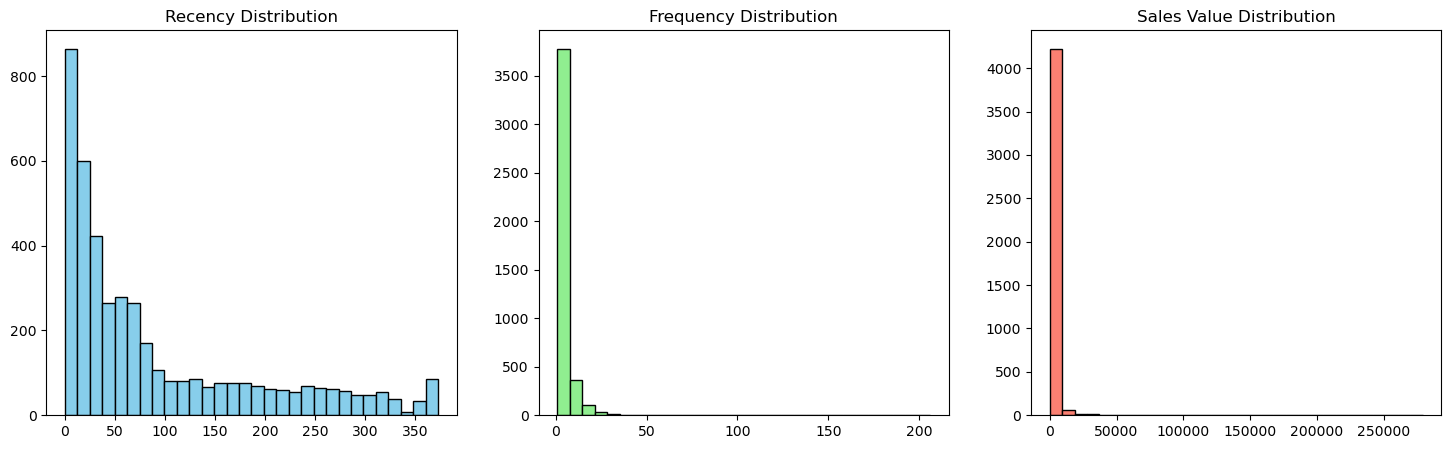

In [39]:
# Graph distributions of RFM features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(df_fe['recency_days'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[1].hist(df_fe['frecuency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[2].hist(df_fe['sale_value'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Sales Value Distribution')


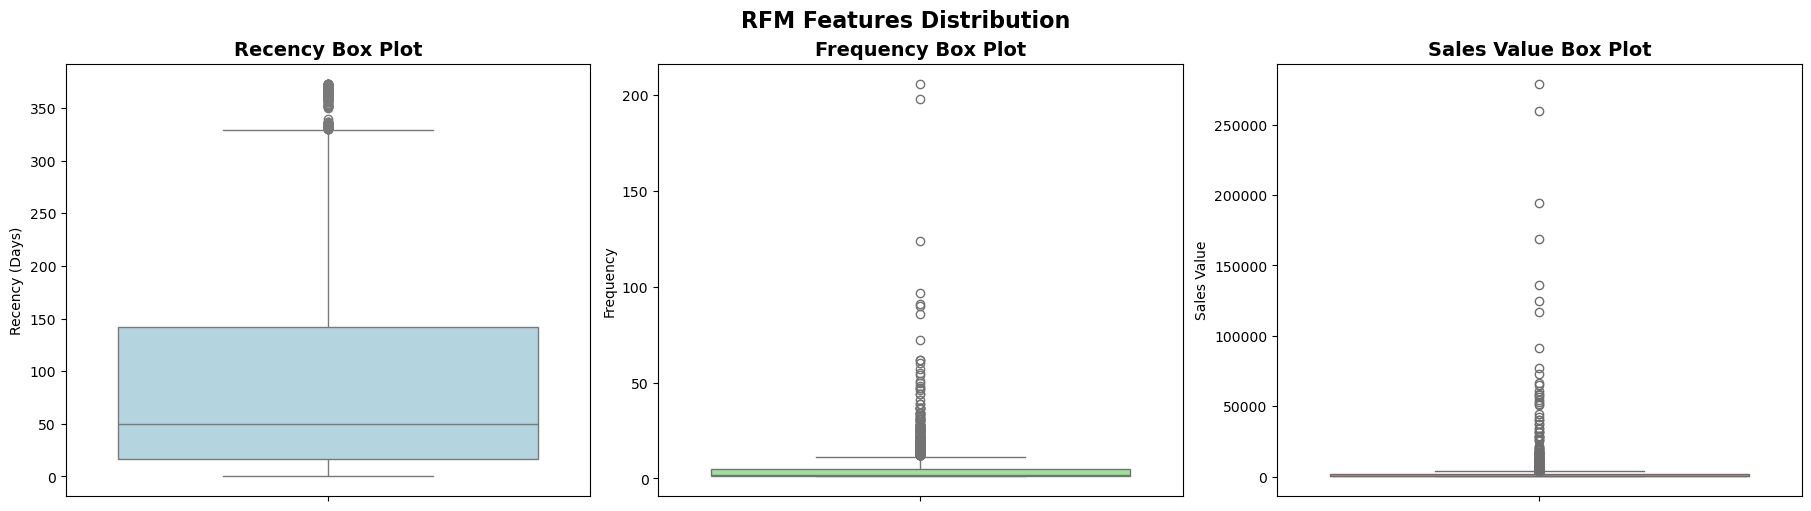

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# Recency box plot
sns.boxplot(y=df_fe['recency_days'], ax=axes[0], color='lightblue')
axes[0].set_title('Recency Box Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Recency (Days)')

# Frequency box plot  
sns.boxplot(y=df_fe['frecuency'], ax=axes[1], color='lightgreen')
axes[1].set_title('Frequency Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frequency')

# Sales value box plot
sns.boxplot(y=df_fe['sale_value'], ax=axes[2], color='lightcoral')
axes[2].set_title('Sales Value Box Plot', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Sales Value')

plt.suptitle('RFM Features Distribution', fontsize=16, fontweight='bold')
plt.show()
